# Crear un parque de atracciones desde 0 empezando por su localizacion


### Empezaremos por encontrar csvs y webs que nos sirvan centrándonos en población, salarios, edad media y aeropuertos

In [54]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")


In [55]:
poblacion_españa = pd.read_csv('C:/Users/noeli/Downloads/2852.csv', sep=';') 

print(poblacion_españa.columns)

print(poblacion_españa['Periodo'].dtype)

#Quedarme solo con 2021
población_españa = poblacion_españa[poblacion_españa['Periodo'] == 2021]
poblacion_españa['Periodo'] = pd.to_numeric(poblacion_españa['Periodo'], errors='coerce')
poblacion_españa_filtrada = poblacion_españa[poblacion_españa['Periodo'] == 2021]
print(poblacion_españa_filtrada)


Index(['Provincias', 'Sexo', 'Periodo', 'Total'], dtype='object')
int64
       Provincias     Sexo  Periodo       Total
0           Total    Total     2021  47.385.107
26          Total  Hombres     2021  23.222.953
52          Total  Mujeres     2021  24.162.154
78    02 Albacete    Total     2021     386.464
104   02 Albacete  Hombres     2021     193.205
...           ...      ...      ...         ...
4004     51 Ceuta  Hombres     2021      42.208
4030     51 Ceuta  Mujeres     2021      41.309
4056   52 Melilla    Total     2021      86.261
4082   52 Melilla  Hombres     2021      43.603
4108   52 Melilla  Mujeres     2021      42.658

[159 rows x 4 columns]


In [56]:
definitivo = poblacion_españa_filtrada.pivot(index='Provincias', columns='Sexo', values='Total').reset_index()


In [58]:
import re
definitivo["Provincias"] = definitivo["Provincias"].str.replace(r"^\d+\s*", "", regex=True)


In [59]:
pip install dateparser

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
aeropuertos_comunidades = pd.read_excel("C:/Users/noeli/Downloads/aeropuertos_comerciales_españa.xlsx")

In [212]:
aeropuertos1 = aeropuertos_comunidades.drop(columns=["Código IATA", "Ciudad principal", "Comunidad Autónoma"])
aeropuertos2 = aeropuertos1.rename(columns={"Provincia": "Provincias"})

In [213]:
pip install lxml


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from bs4 import BeautifulSoup


url = "https://sede.agenciatributaria.gob.es/AEAT/Contenidos_Comunes/La_Agencia_Tributaria/Estadisticas/Publicaciones/sites/mercado/2022/jrubikf1b31c8858155bdb0bed1e4e7d45a9e38faf2d78d.html"


resp = requests.get(url)
resp.encoding = resp.apparent_encoding 
html = resp.text


soup = BeautifulSoup(html, "html.parser")


table = soup.find("table")


renta = pd.read_html(str(table))[0]




C:\Users\noeli\AppData\Local\Temp\ipykernel_33468\1770819690.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  renta = pd.read_html(str(table))[0]


In [215]:
renta_actualizada = renta.rename(columns={"Unnamed: 0": "Provincias"})

In [ ]:
renta_actualizada['Provincias'] = renta_actualizada['Provincias'].replace({
    "Asturias, Principado de": "Asturias",
    "Madrid, Comunidad de": "Madrid",
    "S.C.Tenerife": "Tenerife",
    "Murcia, Región de": "Murcia", "Alicante": "Alicante/Alacant", "Castellón": "Castellón/Castelló", "S. C. Tenerife": "Santa Cruz de Tenerife", "Valencia": "Valencia/València", "A Coruña": "Coruña, A"
})

In [ ]:
valores_a_borrar = ["Total","Andalucía", "Aragón", "Canarias", "Castilla y León", "Castilla - La Mancha", "Cataluña", "Comunitat Valenciana", "Extremadura","Galicia"]

renta_actualizada3 = renta_actualizada[~renta_actualizada['Provincias'].isin(valores_a_borrar)]

In [218]:
renta_actualizada3.drop(columns=["Asalariados", "Percepciones por persona", "Salarios"])

,Provincias,Salario Medio Anual
2,Almería,16.962
3,Cádiz,18.988
4,Córdoba,17.580
5,Granada,18.658
6,Huelva,16.190
7,Jaén,16.012
8,Málaga,19.443
9,Sevilla,19.851
11,Huesca,21.026
12,Teruel,20.777


In [219]:
renta_actualizada2 = renta_actualizada3.sort_values(by="Provincias").reset_index(drop=True)


In [220]:
provincias_salarios = pd.merge(definitivo, renta_actualizada2, on="Provincias", how="outer")


In [221]:
provincias_salarios2 = provincias_salarios.drop(columns=["Asalariados", "Percepciones por persona", "Salarios"])


In [222]:
provincias3 = provincias_salarios2.rename(columns={"Total": "Personas Totales"})

In [224]:
aeropuerto = pd.read_excel("C:/Users/noeli/Downloads/aeropuertos_comerciales_españa.xlsx")

In [225]:
aeropuertos4 = aeropuerto.drop(columns=["Código IATA", "Ciudad principal", "Comunidad Autónoma"])

In [226]:
aeropuertos2 = aeropuertos4.rename(columns={"Provincia": "Provincias"})

In [372]:
aeropuertos2['Provincias'] = aeropuertos2['Provincias'].replace({"Castellón": "Castellón/Castelló", "Reus (Tarragona)": "Tarragona", "A Coruña": "Coruña, A", "Santiago de Compostela": "Coruña, A", "Alicante": "Alicante/Alacant", "Valencia": "Valencia/València"})

In [229]:
local = pd.merge(provincias3, aeropuertos2, on= "Provincias", how= "outer" )

In [ ]:
edad4 = pd.read_csv("C:/Users/noeli/Downloads/3199.csv", sep=';', on_bad_lines='skip')

In [233]:
edad_2022 = edad4[edad4['Periodo'] == 2022]
edad_= edad_2022[edad_2022['Sexo'] == "Ambos sexos"]
edad_ = edad_[edad_['Provincias'] != "Total Nacional"]
import re
edad_["Provincias"] = edad_["Provincias"].str.replace(r"^\d+\s*", "", regex=True)
edad_.rename(columns={"Total": "Edad Media de la Provincia"}, inplace=True)


edad_1 = edad_.drop(columns=["Sexo", "Periodo"])


In [235]:
final = pd.merge(local, edad_1, on= "Provincias", how= "outer" )

In [236]:
columnas = final.columns.tolist()
columnas.remove("Edad Media de la Provincia")
columnas.insert(4, "Edad Media de la Provincia")
final = final[columnas]


In [ ]:
parques = pd.read_excel("C:/Users/noeli/Downloads/provincias_parques_atracciones.xlsx")

In [ ]:

parques.rename(columns={'Provincia': 'Provincias'}, inplace=True)
parques['Provincias'] = parques['Provincias'].replace({
    'Castellón': 'Castellon/Castelló', 'Valencia': 'Valencia/València', 'Alicante': 'Alicante/Alacant', 'La Rioja': 'Rioja, La'
})



In [302]:
final['Hombres'] = final['Hombres'].fillna("Desconocido")
final['Mujeres'] = final['Mujeres'].fillna("Desconocido")
final['Personas Totales'] = final['Personas Totales'].fillna("Desconocido")
final['Edad Media de la Provincia'] = final['Edad Media de la Provincia'].fillna("Desconocido")
final['Salario Medio Anual'] = final['Salario Medio Anual'].fillna("Sin datos")
final['Aeropuerto'] = final['Aeropuerto'].fillna( " - ")




In [304]:
completo = pd.merge(final, parques, on= 'Provincias', how= 'outer')

In [307]:
final_final = provincias_con_aeropuerto[
    (provincias_con_aeropuerto['Salario Medio Anual'] != "Sin datos") &
    (provincias_con_aeropuerto['Personas Totales'] != "Desconocidos") &
    (provincias_con_aeropuerto['Hombres'] != "Desconocido") &
    (provincias_con_aeropuerto['Mujeres'] != "Desconocidos")
]
final_final['Salario Medio Anual'] = final_final['Salario Medio Anual'].replace({"17.04": "17000"})
final_final_finalisima = final_final.drop_duplicates(subset= 'Provincias', keep='first')


C:\Users\noeli\AppData\Local\Temp\ipykernel_33468\2846712486.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_final['Salario Medio Anual'] = final_final['Salario Medio Anual'].replace({"17.04": "17000"})
C:\Users\noeli\AppData\Local\Temp\ipykernel_33468\2846712486.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_final['Salario Medio Anual'] = final_final['Salario Medio Anual'].replace({"17.04": "17000"})


In [308]:
top_20_salarios = final_final_finalisima.sort_values(by='Salario Medio Anual', ascending=False).head(20)


In [310]:
top_20_salarios['Personas Totales'] = (
    top_20_salarios['Personas Totales']
    .astype(str)
    .str.replace(r'[^\d]', '', regex=True) 
    .astype(float)
)

top_10_personas = top_20_salarios.sort_values(
    by='Personas Totales',
    ascending=False
).head(10)

top_10_personas.reset_index(drop=True, inplace=True)





In [317]:
top_10_personas['Edad Media de la Provincia'] = (
    top_10_personas['Edad Media de la Provincia']
    .astype(str)
    .str.replace(',', '.')     
    .str.replace(r'[^\d.]', '', regex=True)  
    .astype(float)
)
provincias_jovenes = top_10_personas[top_10_personas['Edad Media de la Provincia'] < 45.00]


In [331]:
pip install matplotlib pandas plotly folium


     ---------------------------------------- 8.1/8.1 MB 7.1 MB/s eta 0:00:00
     -------------------------------------- 225.2/225.2 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 73.8/73.8 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 10.2 MB/s eta 0:00:00
     -------------------------------------- 113.9/113.9 kB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Empiezan los graficos

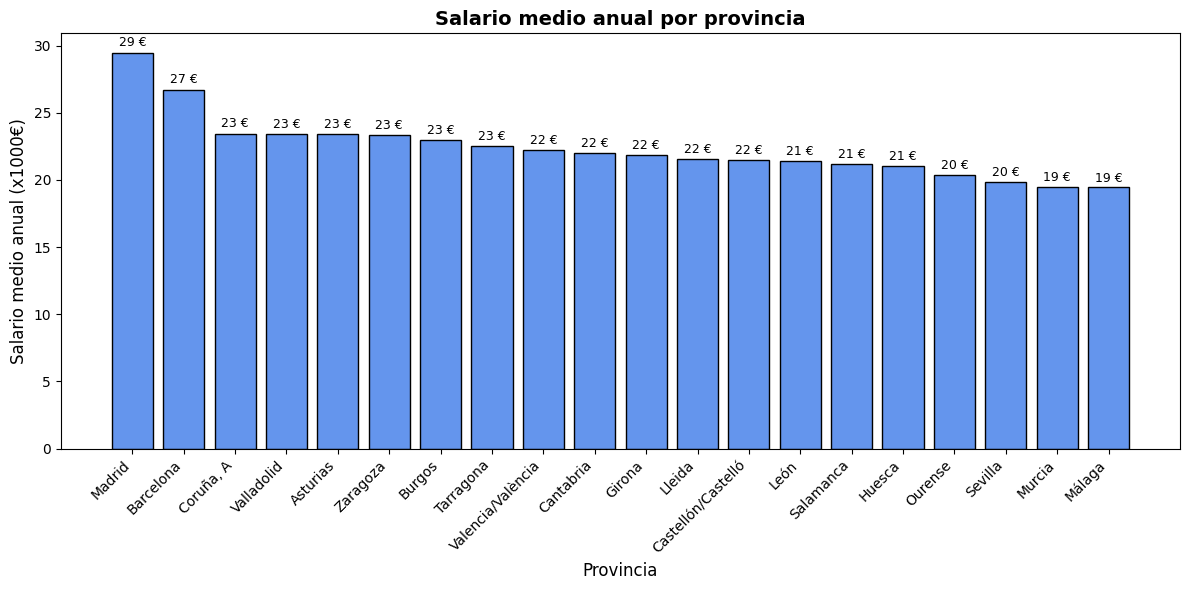

In [350]:
import matplotlib.pyplot as plt
import pandas as pd


# Comprobar que las columnas existen
if not {"Provincias", "Salario Medio Anual"}.issubset(top_20_salarios.columns):
    raise ValueError("El DataFrame debe tener las columnas 'Provincia' y 'Salario Medio Anual'.")

# Ordenar por salario descendente
top_20_salarios = top_20_salarios.sort_values(by="Salario Medio Anual", ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(top_20_salarios["Provincias"], top_20_salarios["Salario Medio Anual"], 
               color="cornflowerblue", edgecolor="black")

# Añadir etiquetas con el valor encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + (yval * 0.01),  # pequeño desplazamiento arriba
        f"{yval:,.0f} €",
        ha="center",
        va="bottom",
        fontsize=9
    )

# Personalizar el gráfico
plt.title("Salario medio anual por provincia", fontsize=14, fontweight="bold")
plt.xlabel("Provincia", fontsize=12)
plt.ylabel("Salario medio anual (x1000€)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Mostrar el gráfico
plt.show()


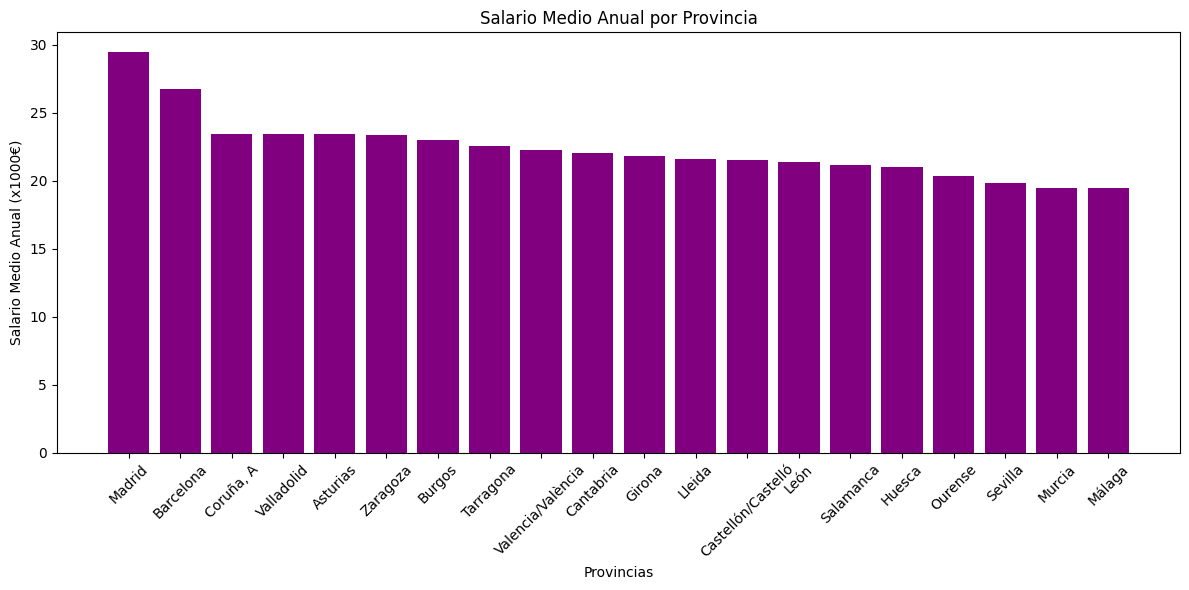

In [357]:
import matplotlib.pyplot as plt

provincias = top_20_salarios['Provincias']
salario_medio = top_20_salarios['Salario Medio Anual']

plt.figure(figsize=(12,6))
plt.bar(provincias, salario_medio, color='purple')
plt.xlabel('Provincias')
plt.ylabel('Salario Medio Anual (x1000€)')
plt.title('Salario Medio Anual por Provincia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


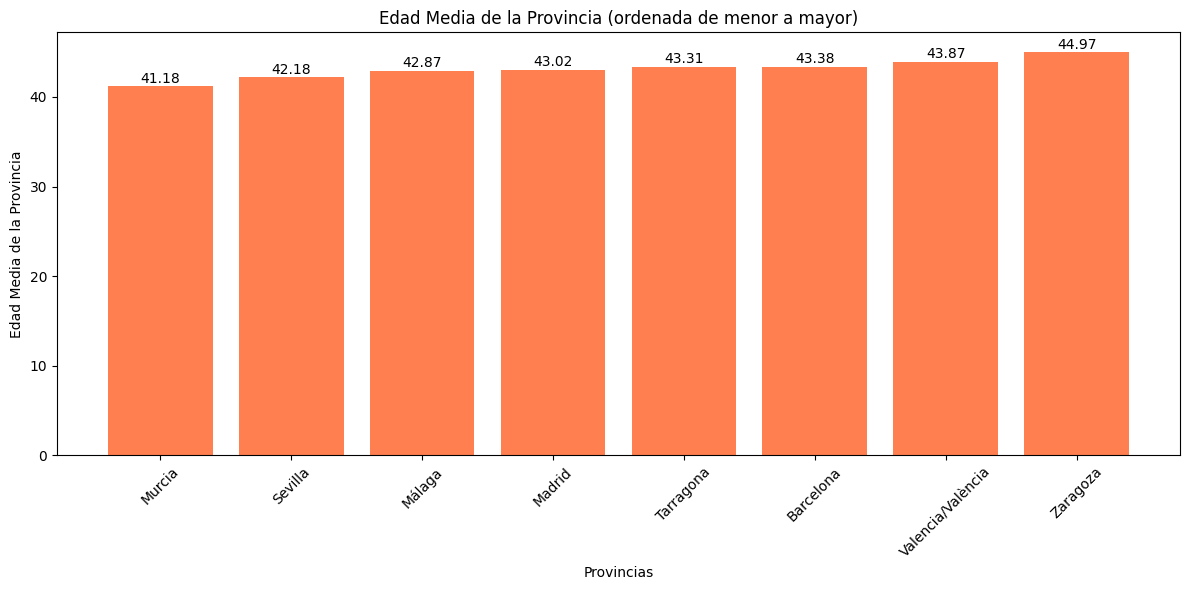

In [342]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame con los datos ya cargados

# Ordenar el DataFrame por 'Edad Media de la Provincia'e
edad_media_baja = provincias_jovenes.sort_values(by='Edad Media de la Provincia')

plt.figure(figsize=(12,6))
bars = plt.bar(edad_media_baja['Provincias'], edad_media_baja['Edad Media de la Provincia'], color='coral')

# Añadir valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('Provincias')
plt.ylabel('Edad Media de la Provincia')
plt.title('Edad Media de la Provincia (ordenada de menor a mayor)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



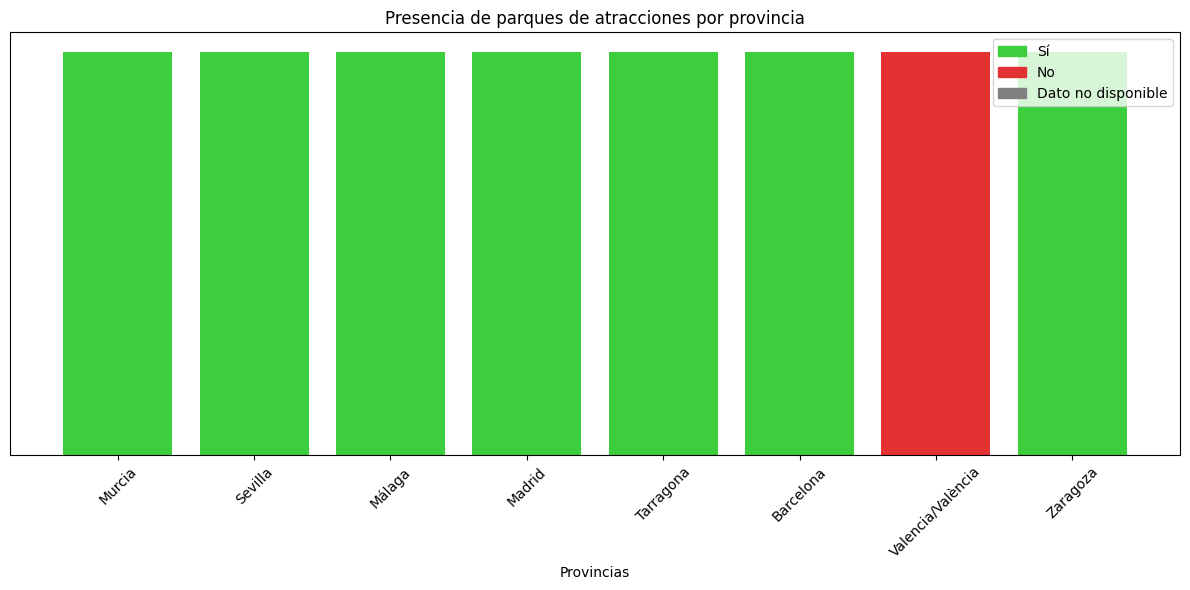

In [369]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df es tu DataFrame con las columnas 'Provincias' y 'Tiene parque de atracciones?'

# Mapear valores para colores
color_map = {'Sí': "#3CCE3C", 'No': "#E43232"}
# Para valores NaN o cualquier otro, asignamos otro color (gris)
colores = edad_media_baja['Tiene parque de atracciones?'].map(color_map).fillna('gray')

plt.figure(figsize=(12,6))
bars = plt.bar(edad_media_baja['Provincias'], height=1, color=colores)

plt.xlabel('Provincias')
plt.title('Presencia de parques de atracciones por provincia')
plt.xticks(rotation=45)

# Añadir leyenda personalizada
import matplotlib.patches as mpatches
leyenda = [mpatches.Patch(color='#3CCE3C', label='Sí'),
           mpatches.Patch(color='#E43232', label='No'),
           mpatches.Patch(color='gray', label='Dato no disponible')]
plt.legend(handles=leyenda)

# Quitamos el eje y porque solo es presencia/ausencia
plt.yticks([])

plt.tight_layout()
plt.show()


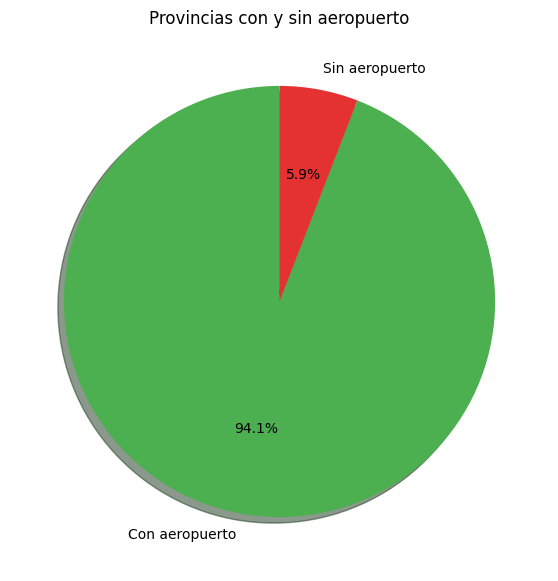

In [370]:
import matplotlib.pyplot as plt

# Crear una nueva columna que diga si tiene aeropuerto o no (True/False)
completo['Tiene aeropuerto'] = completo['Aeropuerto'].notna()

# Contar cuántas provincias tienen aeropuerto y cuántas no
conteo = completo['Tiene aeropuerto'].value_counts()

# Etiquetas para el gráfico
labels = ['Con aeropuerto', 'Sin aeropuerto']

# Colores para cada sector
colors = ['#4CAF50', '#E43232']

plt.figure(figsize=(7,7))
plt.pie(conteo, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
plt.title('Provincias con y sin aeropuerto')
plt.show()
